# Data Science II - Machine Learning para la ciencia de datos

Pre-entrega de Proyecto

Lorenzo Guimaraes - Comisión 60895


#Introducción

Se seleccionó un dataset titulado "Marketing Campaign", el cual contiene información sobre la respuesta de clientes a diversas campañas de marketing de una reconocida empresa del sector venta y delivery de alimentos en Brasil.

.

###Columnas del dataset:

*   **ID:** Identificador de cliente.
*   **Year_Birth:** Año de nacimiento del cliente.
*   **Education:** Nivel de educación del cliente.
*   **Marital_status:** Estado civil del cliente.
*   **Income:** Ingresos anuales del hogar del cliente.
*   **Kidhome:** Número de niños pequeños en el hogar del cliente.
*   **Teenhome:** Número de adolescentes en el hogar del cliente.
*   **DtCustomer:** Fecha de alta del cliente en la empresa.
*   **Recency:** Número de días desde la última compra.
*   **MntFishProducts:** Monto gastado en productos pesqueros en los últimos 2 años.
*   **MntMeatProducts:** Monto gastado en productos cárnicos en los últimos 2 años.
*   **MntFruits:** Monto gastado en productos frutícolas en los últimos 2 años.
*   **MntSweetProducts:** Monto gastado en productos dulces en los últimos 2 años.
*   **MntWines:** Importe gastado en productos vitivinícolas en los últimos 2 años.
*   **MntGoldProds:** Monto gastado en productos de categoría "oro" en los últimos 2 años.
*   **NumDealsPurchases:** Número de compras realizadas con descuento.
*   **NumCatalogPurchases:** Número de compras realizadas mediante un catálogo.
*   **NumStorePurchases:** Número de compras realizadas en tiendas físicas.
*   **NumWebPurchases:** Número de compras realizadas a través de la página web de la empresa.
*   **NumWebVisitsMonth:** Número de visitas al sitio web de la empresa en el último mes.
*   **AcceptedCmp1:** Si el cliente aceptó la oferta en la primera campaña (1 = Sí, 2 = No)
*   **AcceptedCmp2:** Si el cliente aceptó la oferta en la segunda campaña (1 = Sí, 2 = No)
*   **AcceptedCmp3:** Si el cliente aceptó la oferta en la tercera campaña (1 = Sí, 2 = No)
*   **AcceptedCmp4:** Si el cliente aceptó la oferta en la cuarta campaña (1 = Sí, 2 = No)
*   **AcceptedCmp5:** Si el cliente aceptó la oferta en la quinta campaña (1 = Sí, 2 = No)
*   **Complain:** Si el cliente hizo algún reclamo en los últimos 2 años (1 = Sí, 2 = No)
*   **Response:** Si el cliente aceptó la oferta en la ÚLTIMA campaña (1 = Sí, 2 = No)


.
##Objetivo

El objetivo de este proyecto es, a partir de este dataset, entrenar un modelo predictivo, que permita para maximizar el impacto de la próxima campaña de marketing.

.

##Hipótesis

A partir de un análisis de los datos y el desarrollo de un modelo predictivo, se podrá inferir y clasificar que clientes tienen más probabilidad de participar de una campaña, comprando productos durante las ofertas; para así aumentar la precisión y rendimiento de la campaña de marketing.


#Librerías

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Definición del Dataset
url = "https://raw.githubusercontent.com/Larrentawn/marketing-campaign/main/marketing_campaign.csv"
df = pd.read_csv(url, sep=';')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


#Análisis exploratorio

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Axes: title={'center': 'Distribución de Estado civil'}, xlabel='Estado civil', ylabel='Frecuencia'>

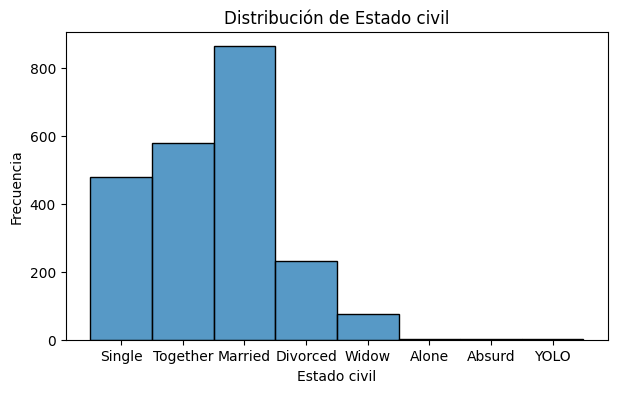

In [6]:
#Distribución por Estado civil

plt.figure(figsize=(7,4))
plt.title('Distribución de Estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Frecuencia')
sns.histplot(x='Marital_Status',data=df)


Se puede ver en la distribución, muy pocos datos en 3 de los valores de la columna de Estado civil.

<Axes: title={'center': 'Distribución de Ingresos'}, xlabel='Ingresos', ylabel='Frecuencia'>

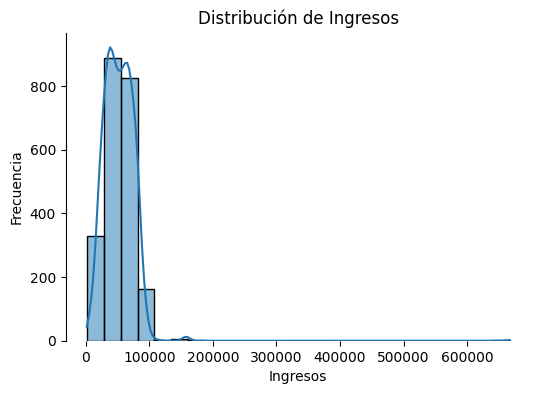

In [7]:
# Distribución de Ingresos

plt.figure(figsize=(6,4))
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
sns.despine(bottom=True)
sns.histplot(df.Income, bins=25, kde=True)

##Manipulación de datos nulos


In [8]:
# Verificacion de nulos y recuento
nulos = df.isnull()
print(nulos.sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [9]:
#Al ser los valores nulos de una sola columna, se pueden reemplazar directamente con .fillna
#Se utiliza la media ya que para este caso, un promedio del salario esta bien para los pocos valores nulos.

df = df.fillna(df["Income"].median())

#Se muestra la cantidad de nulos
print(f"Cantidad Nulos: %d\n" % df.isnull().to_numpy().sum())
df.isnull().sum()

Cantidad Nulos: 0



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
df = pd.DataFrame(df)

In [11]:
#Chequeo de duplicados
df.duplicated().sum()

0

In [12]:
df[df.duplicated()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [13]:
#Eliminamos duplicados
df=df.drop_duplicates()
print(df.shape)

(2240, 29)


##Modificación de columnas

In [14]:
#  anexado de los tres valores bajos de Marital_Status a un solo: Soltero ("Single").
df['Marital_Status'] = df['Marital_Status'].replace(to_replace={'Alone', 'Absurd', 'YOLO'}, value='Single')
print('Columna estado civil: \n',df['Marital_Status'])

#Sumatoria hijos adolescentes y niños a una sola columna "hijos"
df['Children'] = df.loc[:,['Teenhome','Kidhome']].sum(axis=1)
print('Columna hijos: \n',df['Children'])

#Sumatoria de monto de productos comprados
df['MntTotalProducts'] = df.loc[:,['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
print('Columna suma de monto productos: \n',df['MntTotalProducts'])

#Se hace una sumatoria las variables de las diversas campañas en las cuales se compró, a un recuento de en cuantas campañas compró
df['AcceptedCmpTotal'] = df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
print('Columna total campaña aceptada: \n',df['AcceptedCmpTotal'])

Columna estado civil: 
 0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object
Columna hijos: 
 0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64
Columna suma de monto productos: 
 0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: MntTotalProducts, Length: 2240, dtype: int64
Columna total campaña aceptada: 
 0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: AcceptedCmpTotal, Length: 2240, dtype: int64


<Axes: title={'center': 'Distribución por Estado civil'}, xlabel='Estado civil', ylabel='Frecuencia'>

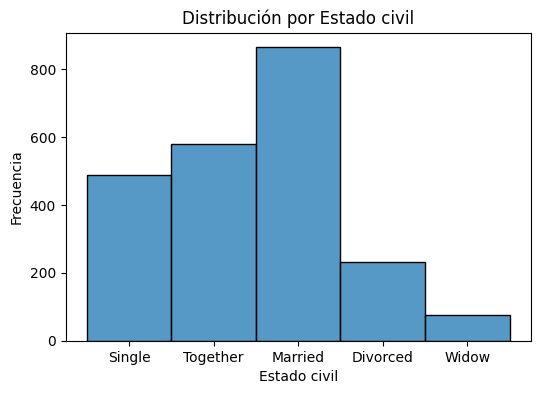

In [15]:
#Ahora al hacer la misma distribución por estado civil

plt.figure(figsize=(6,4))
plt.title('Distribución por Estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Frecuencia')
sns.histplot(x='Marital_Status',data=df)

<Axes: title={'center': 'Distribución por Cantidad de hijos'}, xlabel='Hijos', ylabel='Frecuencia'>

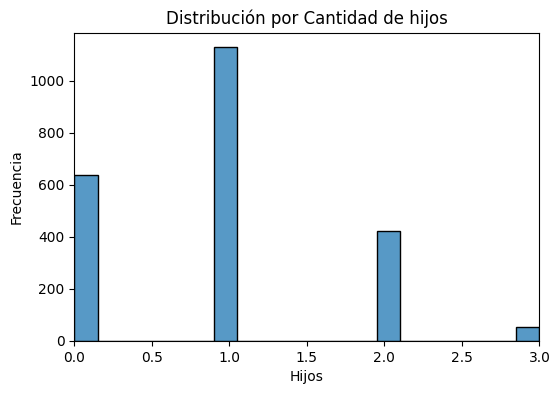

In [16]:
#Dristribución por cantidad de hijos

plt.figure(figsize=(6,4))
plt.title('Distribución por Cantidad de hijos')
plt.xlabel('Hijos')
plt.ylabel('Frecuencia')
plt.xlim([0,3])
sns.histplot(x='Children',data=df)

Se puede ver una mayor concentración de clientes con 1 hijo, siguiendole clientes sin hijos, y menor frecuencia de 2 y 3 hijos.

##Visualización de datos y detección de outliers


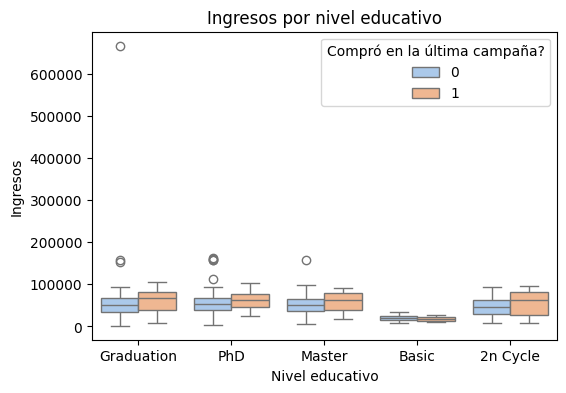

In [17]:
#Boxplot de salarios por nivel educativo

plt.figure(figsize=(6,4))
plt.title('Ingresos por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingresos')
sns.boxplot(x='Education', y='Income', hue='Response', data=df, palette='pastel')
plt.legend(title="Compró en la última campaña?", fancybox=True)

En este último, se puede ver un outlier excesivamente alejado del resto de los datos, el cual puede ser un error de input.

Se procede a tratar estos outliers

In [18]:
# Se definen los quartiles y el rango (caja) inter-cuartil
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
RangoInterQuartil = Q3 - Q1

# Se definen los outliers mayores que el resultado de la suma de Q3 + rango intercuartil * 1.5
Income_outliers = df[df.Income > Q3 + 1.5 * RangoInterQuartil]

# Se aplican al dataframe los que no entran en la categoría de outlier
df = df[df.Income < Q3 + 1.5 * RangoInterQuartil]

#Vemos cuales fueron los datos que quedaron fuera
Income_outliers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,MntTotalProducts,AcceptedCmpTotal
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,3,11,0,1,1608,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,3,11,0,2,107,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,3,11,0,0,6,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,3,11,0,0,1717,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,3,11,0,1,59,0


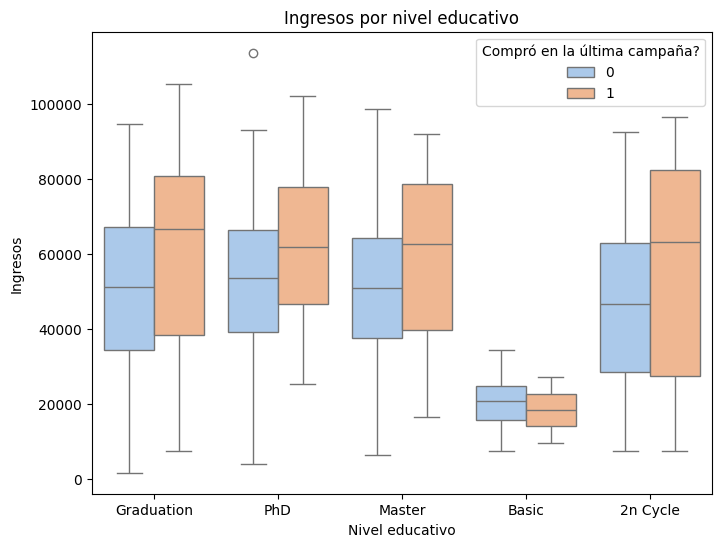

In [19]:
#Se visualiza el nuevo Boxplot de salarios por nivel educativo

plt.figure(figsize=(8,6))
plt.title('Ingresos por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingresos')
sns.boxplot(x='Education', y='Income', hue='Response', palette='pastel', data=df)
plt.legend(title="Compró en la última campaña?", fancybox=True)

Ahora se pueden ver los outliers reales de esta variable.

Se puede destacar, además de los ingresos por nivel educativo; **la relación entre haber participado de la última campaña, con el poder adquisitivo.**

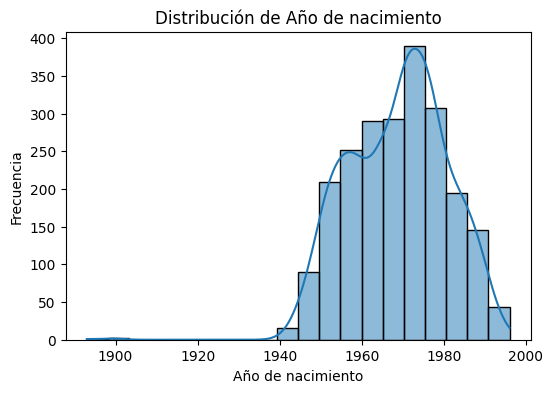

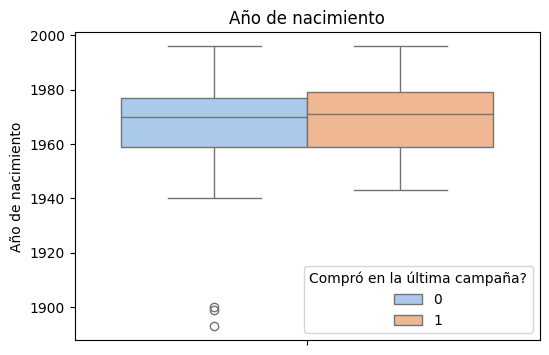

In [20]:
#Histograma de distribución de año de nacimiento/edad

plt.figure(figsize=(6,4))
plt.title('Distribución de Año de nacimiento')
plt.xlabel('Año de nacimiento')
plt.ylabel('Frecuencia')
sns.histplot(df.Year_Birth, bins=20, kde=True)

# Boxplot de Año de nacimiento y respuesta
plt.figure(figsize=(6,4))
plt.title('Año de nacimiento')
plt.xlabel('')
plt.ylabel('Año de nacimiento')
sns.boxplot(y=df.Year_Birth, hue='Response', palette='pastel', data=df)
plt.legend(title="Compró en la última campaña?", fancybox=True)

En la columna Año de Nacimiento tambien nos encontramos con outliers excesivamente alejados de la media.

No se aprecia una diferencia de edades en cuestión de si aceptó o no la campaña.

Continuamos a tratarlos al igual que los de ingreso, pero antes, es más convieniente convertir el año de nacimiento a una **variable discreta**, en este caso, **edad** en años.

In [21]:
# Primero modificamos la variable de Año de Nacimiento a Edad
df['Age'] = datetime.today().year - df['Year_Birth']

# Se definen los quartiles y el rango (caja) inter-cuartil
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
RangoInterQuartil = Q3 - Q1

# Se definen los outliers mayores que el resultado de la suma de Q3 + rango intercuartil * 1.5
Age_outliers = df[df.Age > Q3 + 1.5 * RangoInterQuartil]

# Se aplican al dataframe los que no entran en la categoría de outlier
df = df[df.Age < Q1 + 1.5 * RangoInterQuartil]

#Vemos cuales fueron los datos que quedaron fuera
Age_outliers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,MntTotalProducts,AcceptedCmpTotal,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,1,3,11,0,1,65,0,124
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,3,11,0,1,22,0,131
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,0,3,11,0,0,1853,1,125


<Axes: title={'center': 'Distribución de Edad'}, xlabel='Edad (años)', ylabel='Frecuencia'>

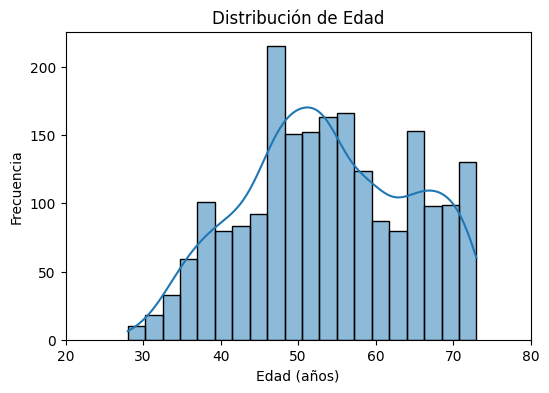

In [22]:
#Histograma de distribución de edad sin outlier

plt.figure(figsize=(6,4))
plt.title('Distribución de Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.xlim(20,80)
sns.histplot(df['Age'], bins=20, kde=True)

Se puede observar una concentración mayor en el rango 45-60 y hasta los 70+ años.

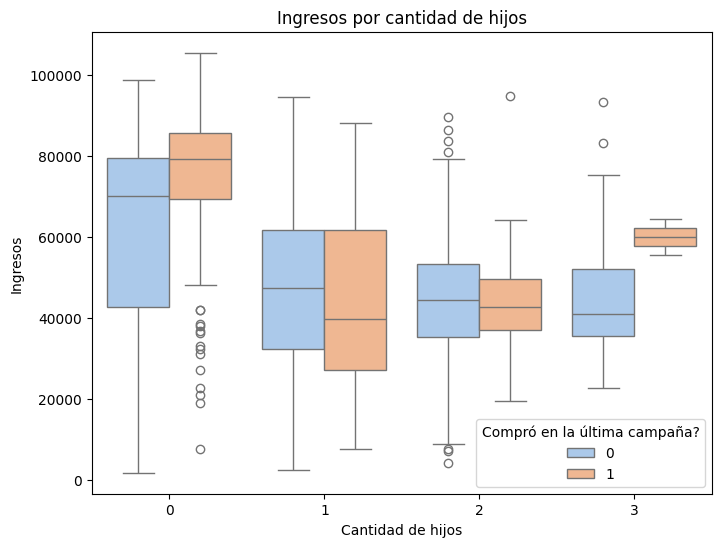

In [23]:
plt.figure(figsize=(8,6))
plt.title('Ingresos por cantidad de hijos')
plt.xlabel('Cantidad de hijos')
plt.ylabel('Ingresos')
sns.boxplot(x='Children', y='Income', hue='Response', palette='pastel', data=df)
plt.legend(title="Compró en la última campaña?", fancybox=True)

<Axes: title={'center': 'Monto gastado en productos por campaña y cantidad de hijos'}, xlabel='Campañas participadas', ylabel='Monto gastado en productos'>

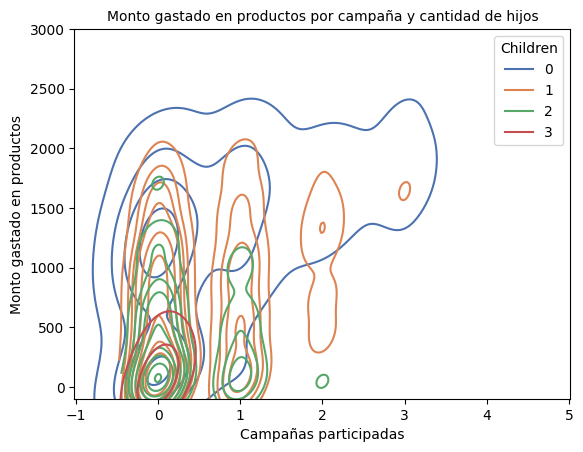

In [24]:
# Kdeplot de compras en cada campaña por grupos de cant. de hijos

fig, ax = plt.subplots()
plt.title('Monto gastado en productos por campaña y cantidad de hijos',fontsize= "10")
plt.xlabel('Campañas participadas')
plt.ylabel('Monto gastado en productos')
plt.ylim([-100,3000])
sns.kdeplot(x="AcceptedCmpTotal",y='MntTotalProducts', hue='Children', data=df, palette='deep')

En este último gráfico se puede ver una tendencia en la cual:
* los grupos de **menor** cantidad de hijos, tuvieron **mayor** participación en campañas y **mayor** gasto en productos que los grupos con más hijos.

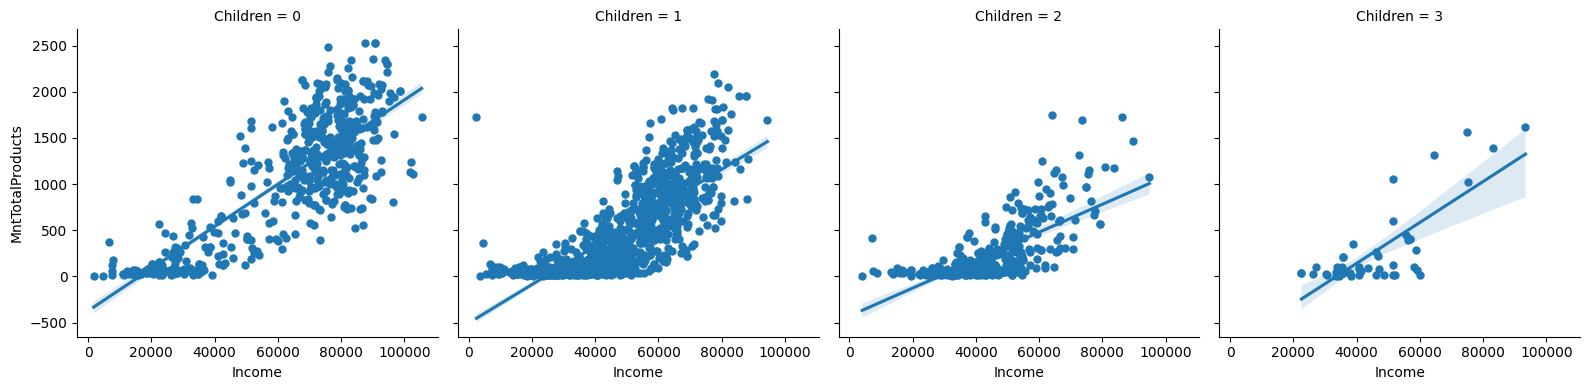

In [25]:
# Otra visualización de la cantidad de compras por Ingresos, en grupos: sin hijos, 1, 2 y 3 hijos

sns.lmplot(data=df, x="Income", y="MntTotalProducts", col='Children', col_wrap=4, height=4, scatter_kws={"s": 25, "alpha": 1})

Se puede ver mas claramente la cantidad de incidencias en cada grupo (0,1,2 y 3 hijos) y la distribución de compras relacionada a los Ingresos.

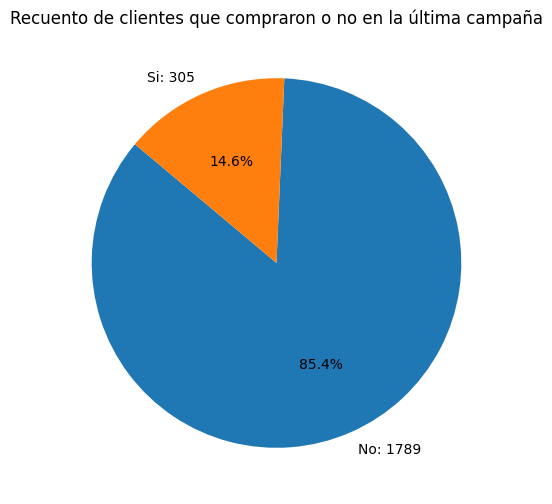

<Axes: xlabel='Response', ylabel='Count'>

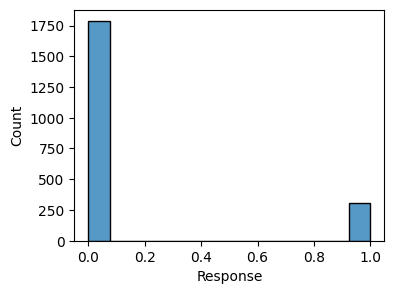

In [29]:
# Count de cuantos compraron y cuantos no en la última campaña

recuento_response = df['Response'].value_counts()
label_response = [f'No: {recuento_response.values[0]}', f'Si: {recuento_response.values[1]}']

plt.figure(figsize=(6,6))
plt.pie(recuento_response, labels=label_response, autopct='%1.1f%%',startangle=140)
plt.title('Recuento de clientes que compraron o no en la última campaña')
plt.show()

plt.figure(figsize=(4,3))
sns.histplot(df['Response'])

Se puede ver la diferencia en cantidad de clientes que compraron en la ultima campaña y los que no.

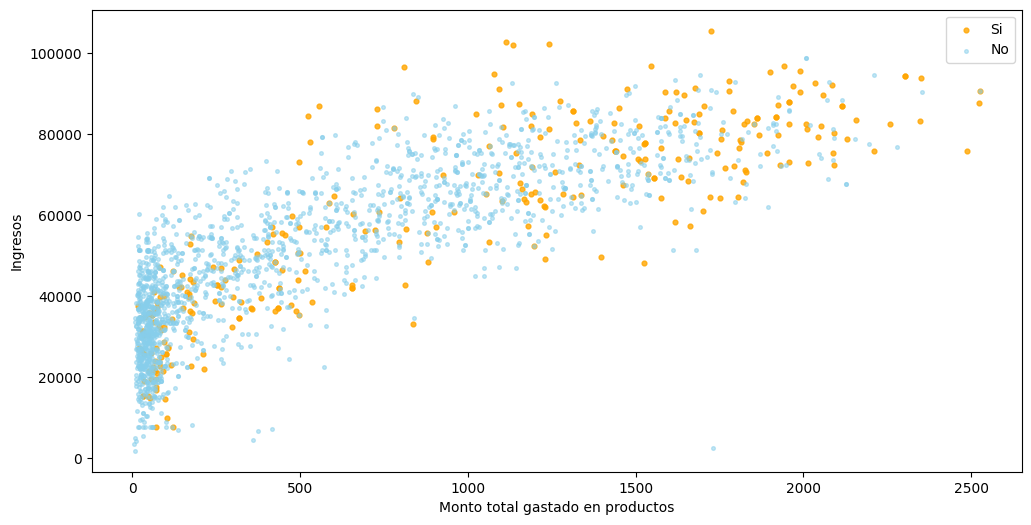

In [30]:
# Scatterplot para ver la relación entre gasto e ingresos

# Defino los grupos en compró o no compró
positivo = df[df['Response']==1]
negativo = df[df['Response']==0]
label_response = ['Si', 'No']

plt.figure(figsize=(12,6))
plt.scatter(positivo['MntTotalProducts'], positivo['Income'], color="orange", alpha=0.8, s=12,label="Response 1 (compró)")
plt.scatter(negativo['MntTotalProducts'], negativo['Income'], color="skyblue", alpha=0.5, s=7, label="Response 0 (no compró)")
plt.legend(labels=label_response)

plt.xlabel("Monto total gastado en productos")
plt.ylabel("Ingresos")
plt.show()

Se destaca la agrupación de casos en los que aceptaron la última campaña, gastaron más en productos, y tienden a tener mayores ingresos que la media de los que no aceptaron la última campaña.